In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import optimize

from datetime import timedelta

In [2]:
data = pd.read_csv('data/COVID-19-Cleaned-with-Population.csv')
data['date'] = pd.to_datetime(data['date'])

# remove rows with 0 confirmed cases
data = data.query('cumulative_confirmed >= 10').reset_index(drop=True)

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,population
0,Afghanistan,2020-03-14,11,11,0,0,4,4,0,0,37172386.0
1,Afghanistan,2020-03-15,16,16,0,0,5,5,0,0,37172386.0
2,Afghanistan,2020-03-16,20,21,0,1,4,5,0,1,37172386.0
3,Afghanistan,2020-03-17,21,22,0,1,1,1,0,0,37172386.0
4,Afghanistan,2020-03-18,21,22,0,1,0,0,0,0,37172386.0


In [3]:
# data = data.merge(populations, on='region', how='left')

for column in data.columns:
    if column not in {'date', 'region', 'population'}:
        data['{}_rate_per_million'.format(column)] = 1e6 * (data[column] / data['population'])

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,population,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million
0,Afghanistan,2020-03-14,11,11,0,0,4,4,0,0,37172386.0,0.295919,0.295919,0.0,0.000000,0.107607,0.107607,0.0,0.000000
1,Afghanistan,2020-03-15,16,16,0,0,5,5,0,0,37172386.0,0.430427,0.430427,0.0,0.000000,0.134508,0.134508,0.0,0.000000
2,Afghanistan,2020-03-16,20,21,0,1,4,5,0,1,37172386.0,0.538034,0.564935,0.0,0.026902,0.107607,0.134508,0.0,0.026902
3,Afghanistan,2020-03-17,21,22,0,1,1,1,0,0,37172386.0,0.564935,0.591837,0.0,0.026902,0.026902,0.026902,0.0,0.000000
4,Afghanistan,2020-03-18,21,22,0,1,0,0,0,0,37172386.0,0.564935,0.591837,0.0,0.026902,0.000000,0.000000,0.0,0.000000


In [4]:
data['region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China',
       'Colombia', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cruise Ships', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives',
       'Malta', 'Martinique', 'Mauritius',

In [5]:
reference_countries = ['China', 'Italy', 'Iran', 'Canada', 'United Kingdom', 'US']
na_countries = ['US', 'Canada', 'Mexico']
eu_countries = ['Italy', 'United Kingdom', 'France', 'Sweden', 'Switzerland', 'Spain', 'Germany']
asian_countries = ['Japan', 'China', 'Taiwan*', 'Thailand', 'Korea, South']

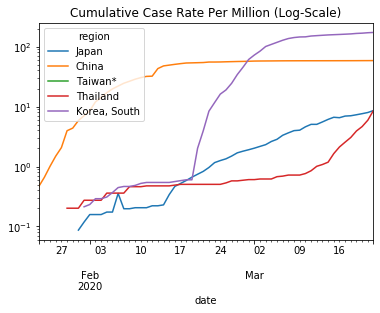

In [6]:
data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[asian_countries].plot(logy=True, title='Cumulative Case Rate Per Million (Log-Scale)')

In [7]:
data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)

region,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


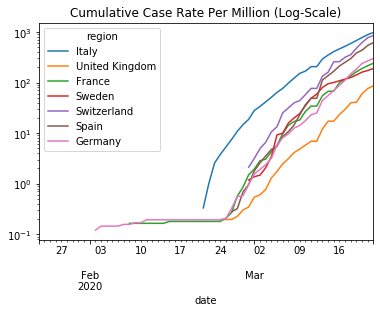

In [8]:
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[eu_countries].plot(logy=True, title='Cumulative Case Rate Per Million (Log-Scale)')

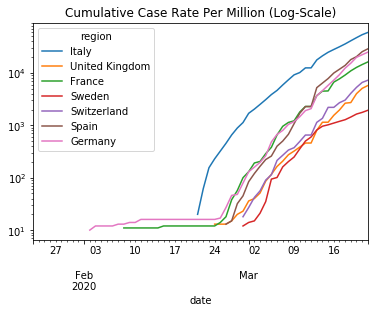

In [9]:
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed'
)[eu_countries].plot(logy=True, title='Cumulative Case Rate Per Million (Log-Scale)')

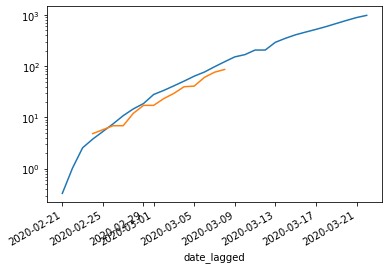

In [10]:
ax = data.query('region == "Italy"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False)

df = data.query('region == "United Kingdom"').sort_values('date').copy()
df['date_lagged'] = df['date'].shift(14)
df.dropna().plot(x='date_lagged', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False)


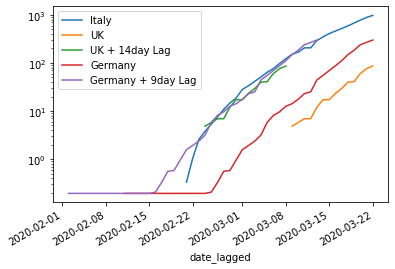

In [11]:
ax = data.query('region == "Italy"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False, label='Italy')

df = data.query('region == "United Kingdom"').sort_values('date').copy()
df['date_lagged'] = df['date'].shift(14)
df.dropna().plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='UK')
df.dropna().plot(x='date_lagged', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='UK + 14day Lag')
# ax = data.query('region == "South Korea"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False, label='South Korea', ax=ax)
# ax = data.query('region == "Mainland China"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False, label='China', ax=ax)


df = data.query('region == "Germany"').sort_values('date').copy()
df['date_lagged'] = df['date'].shift(9)
df.dropna().plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='Germany')
df.dropna().plot(x='date_lagged', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='Germany + 9day Lag')

plt.legend()

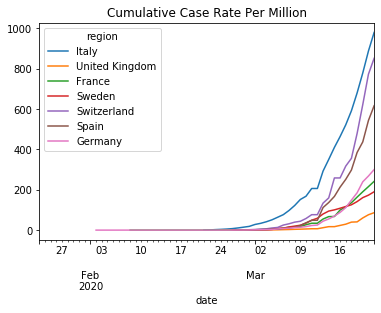

In [12]:
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[eu_countries].plot(logy=False, title='Cumulative Case Rate Per Million')

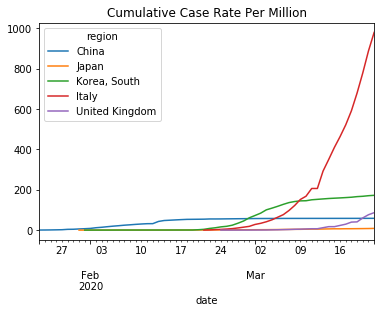

In [13]:
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[['China', 'Japan', 'Korea, South', 'Italy', 'United Kingdom']].plot(logy=False, title='Cumulative Case Rate Per Million')

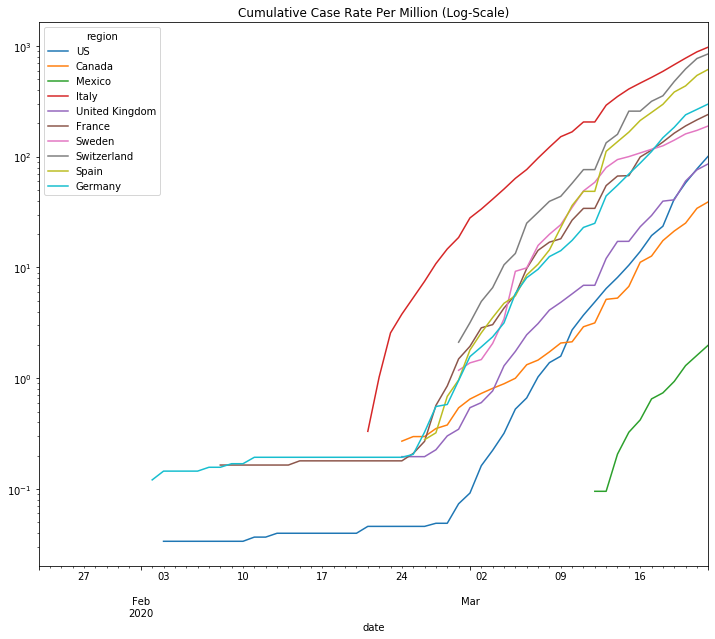

In [14]:
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[na_countries + eu_countries].plot(
    logy=True, title='Cumulative Case Rate Per Million (Log-Scale)', ax=ax)

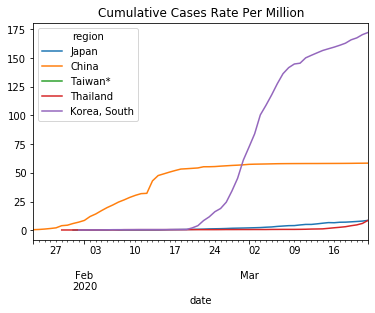

In [15]:
data.query('cumulative_confirmed > 0').pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[asian_countries].plot(logy=False, title='Cumulative Cases Rate Per Million')

In [16]:
first_infection_date = data.groupby('region')['date'].min()
first_death_date = data.query('cumulative_deaths > 0').groupby('region')['date'].min()

In [17]:
time_to_death = first_death_date - first_infection_date

time_to_death

region
Afghanistan       8 days
Albania           1 days
Algeria           8 days
Andorra           5 days
Argentina         0 days
                   ...  
United Kingdom   10 days
Uruguay              NaT
Uzbekistan           NaT
Venezuela            NaT
Vietnam              NaT
Name: date, Length: 125, dtype: timedelta64[ns]

/Users/miroslaw/anaconda/envs/covid19/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/miroslaw/anaconda/envs/covid19/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([36., 24., 13.,  6.,  0.,  3.,  1.,  1.,  1.,  1.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <a list of 10 Patch objects>)

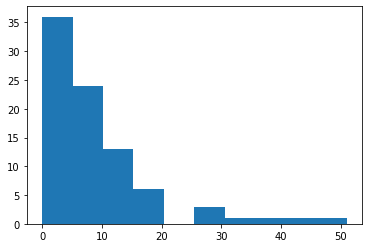

In [18]:
plt.hist(time_to_death.dt.days)

In [20]:
data.groupby('date')['cumulative_deaths'].sum() / data.groupby('date')['cumulative_confirmed'].sum() 

date
2020-01-23    0.027994
2020-01-24    0.028261
2020-01-25    0.029872
2020-01-26    0.026988
2020-01-27    0.028502
2020-01-28    0.023719
2020-01-29    0.021800
2020-01-30    0.020915
2020-01-31    0.021581
2020-02-01    0.021619
2020-02-02    0.021573
2020-02-03    0.021429
2020-02-04    0.020586
2020-02-05    0.020404
2020-02-06    0.020563
2020-02-07    0.020901
2020-02-08    0.021707
2020-02-09    0.022561
2020-02-10    0.023689
2020-02-11    0.024844
2020-02-12    0.024724
2020-02-13    0.022710
2020-02-14    0.022770
2020-02-15    0.024135
2020-02-16    0.024853
2020-02-17    0.025501
2020-02-18    0.026715
2020-02-19    0.028032
2020-02-20    0.029470
2020-02-21    0.029306
2020-02-22    0.031283
2020-02-23    0.031269
2020-02-24    0.033039
2020-02-25    0.033677
2020-02-26    0.034039
2020-02-27    0.034020
2020-02-28    0.034164
2020-02-29    0.034217
2020-03-01    0.033928
2020-03-02    0.034198
2020-03-03    0.034069
2020-03-04    0.034240
2020-03-05    0.034235
2020-0

In [21]:
death_rate_per_country = (data.groupby(['date', 'region'])['cumulative_deaths'].sum() / data.groupby(['date', 'region'])['cumulative_confirmed'].sum())['2020-03-10']

death_rate_per_country[death_rate_per_country > 0] * 100

region
Argentina         5.882353
Australia         2.803738
Canada            1.265823
China             3.880722
Cruise Ships      0.786370
Egypt             1.694915
France            1.841518
Germany           0.137268
Iran              3.618503
Iraq              9.859155
Italy             6.217361
Japan             1.721170
Korea, South      0.718754
Lebanon           2.439024
Netherlands       1.047120
Philippines       3.030303
San Marino        3.921569
Spain             2.064897
Switzerland       0.610998
Taiwan*           2.127660
Thailand          1.886792
US                3.139013
United Kingdom    1.562500
dtype: float64

In [22]:
surv = data.groupby(['region', 'date'])['cumulative_confirmed'].sum()  - data.groupby(['region', 'date'])['cumulative_deaths'].sum()
dead = data.groupby(['region', 'date'])['cumulative_deaths'].sum()

In [23]:
from scipy import stats

stats.beta(dead['US'].max() + 1, surv['US'].max() + 1 ).interval(0.95)

(0.011392098015267901, 0.0137877908039713)

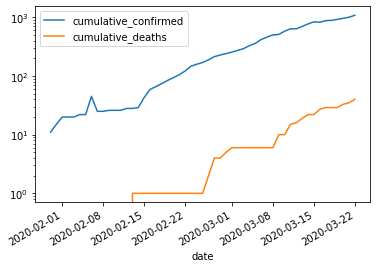

In [24]:
df = data.query('region == "Japan"')

df.plot(x='date', y=['cumulative_confirmed', 'cumulative_deaths'], logy=True)


In [25]:
def plot_country_lagged_deaths(data, country, lag=0, ax=None):
    df = data.query('region == "{}"'.format(country)).sort_values('date').copy()
    df['date_lagged'] = df['date'].shift(lag)
    ax = df.plot(
        x='date_lagged', 
        y='cumulative_deaths', 
        logy=True, 
        ax=ax, 
        title='{} Covid Cases'.format(country),
        label='cumulative_deaths - {} day lag'.format(lag)
    )
    
    ax = df.plot(
        x='date', 
        y=['cumulative_confirmed', 'cumulative_deaths'], 
        logy=True, 
        ax=ax, 
        title='{} Covid Cases'.format(country)
    )
    
    return ax

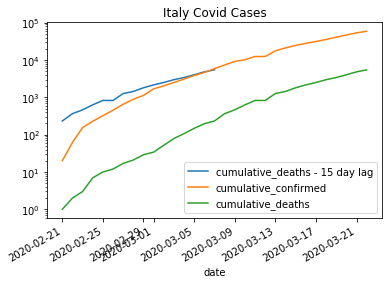

In [28]:
plot_country_lagged_deaths(data, 'Italy', lag=15)

In [29]:
data.groupby('region')['cumulative_confirmed'].max().sort_values()[-15:]

region
Sweden             1934
Norway             2383
Austria            3244
Belgium            3401
Netherlands        4216
United Kingdom     5741
Switzerland        7245
Korea, South       8897
France            16176
Iran              21638
Germany           24873
Spain             28768
US                33193
Italy             59138
China             81397
Name: cumulative_confirmed, dtype: int64

In [30]:
data.groupby('region')['cumulative_confirmed_rate_per_million'].max().dropna().sort_values()[-15:]

region
Denmark           261.149479
Iran              264.522357
Belgium           297.756939
Germany           299.935165
Austria           366.676436
Norway            448.409735
Monaco            594.591800
Spain             615.704018
Switzerland       850.697284
Liechtenstein     975.995779
Italy             978.599114
Luxembourg       1313.087434
Andorra          1467.418123
Iceland          1606.452963
San Marino       4735.829510
Name: cumulative_confirmed_rate_per_million, dtype: float64

In [31]:
data.groupby('region')['cumulative_deaths'].max().sort_values()[-15:]

region
Turkey              30
Japan               40
Indonesia           48
Belgium             75
Germany             94
Switzerland         98
Korea, South       104
Netherlands        180
United Kingdom     282
US                 416
France             674
Iran              1685
Spain             1772
China             3265
Italy             5476
Name: cumulative_deaths, dtype: int64

In [32]:
data.groupby('region')['cumulative_deaths_rate_per_million'].max().dropna().sort_values()[-15:]

region
Sweden              2.062225
Denmark             2.242367
China               2.344317
United Kingdom      4.241304
Belgium             6.566237
France             10.061617
Netherlands        10.446278
Switzerland        11.507016
Andorra            12.986001
Luxembourg         13.163784
Iceland            14.141311
Iran               20.598954
Spain              37.925039
Italy              90.615319
San Marino        591.978689
Name: cumulative_deaths_rate_per_million, dtype: float64

In [33]:
first_infection_date

region
Afghanistan      2020-03-14
Albania          2020-03-10
Algeria          2020-03-04
Andorra          2020-03-17
Argentina        2020-03-08
                    ...    
United Kingdom   2020-02-24
Uruguay          2020-03-17
Uzbekistan       2020-03-17
Venezuela        2020-03-15
Vietnam          2020-02-06
Name: date, Length: 125, dtype: datetime64[ns]

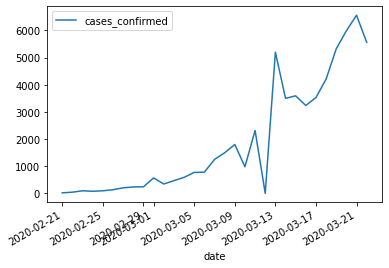

In [34]:
data.query('region == "Italy"').plot(x='date', y='cases_confirmed')

In [35]:
data = data.set_index('region')

data['t'] = (data['date'] - first_infection_date).dt.days

data = data.reset_index()

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,population,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t
0,Afghanistan,2020-03-14,11,11,0,0,4,4,0,0,37172386.0,0.295919,0.295919,0.0,0.000000,0.107607,0.107607,0.0,0.000000,0
1,Afghanistan,2020-03-15,16,16,0,0,5,5,0,0,37172386.0,0.430427,0.430427,0.0,0.000000,0.134508,0.134508,0.0,0.000000,1
2,Afghanistan,2020-03-16,20,21,0,1,4,5,0,1,37172386.0,0.538034,0.564935,0.0,0.026902,0.107607,0.134508,0.0,0.026902,2
3,Afghanistan,2020-03-17,21,22,0,1,1,1,0,0,37172386.0,0.564935,0.591837,0.0,0.026902,0.026902,0.026902,0.0,0.000000,3
4,Afghanistan,2020-03-18,21,22,0,1,0,0,0,0,37172386.0,0.564935,0.591837,0.0,0.026902,0.000000,0.000000,0.0,0.000000,4


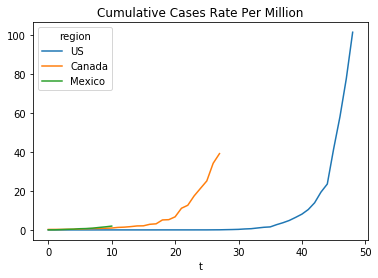

In [36]:
data.pivot(
    index='t', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[na_countries].plot(logy=False, title='Cumulative Cases Rate Per Million')

In [37]:
first_date_at_least_rate_over_1 = data.query('cumulative_confirmed_rate_per_million > 0').groupby('region')['date'].min()

In [38]:
first_date_at_least_rate_over_1

region
Afghanistan            2020-03-14
Albania                2020-03-10
Algeria                2020-03-04
Andorra                2020-03-17
Argentina              2020-03-08
                          ...    
United Arab Emirates   2020-02-22
United Kingdom         2020-02-24
Uruguay                2020-03-17
Uzbekistan             2020-03-17
Vietnam                2020-02-06
Name: date, Length: 119, dtype: datetime64[ns]

In [39]:
data = data.set_index('region')

data['t_at_rate_over_1'] = (data['date'] - first_date_at_least_rate_over_1).dt.days

data = data.reset_index()

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,...,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t,t_at_rate_over_1
0,Afghanistan,2020-03-14,11,11,0,0,4,4,0,0,...,0.295919,0.295919,0.0,0.000000,0.107607,0.107607,0.0,0.000000,0,0.0
1,Afghanistan,2020-03-15,16,16,0,0,5,5,0,0,...,0.430427,0.430427,0.0,0.000000,0.134508,0.134508,0.0,0.000000,1,1.0
2,Afghanistan,2020-03-16,20,21,0,1,4,5,0,1,...,0.538034,0.564935,0.0,0.026902,0.107607,0.134508,0.0,0.026902,2,2.0
3,Afghanistan,2020-03-17,21,22,0,1,1,1,0,0,...,0.564935,0.591837,0.0,0.026902,0.026902,0.026902,0.0,0.000000,3,3.0
4,Afghanistan,2020-03-18,21,22,0,1,0,0,0,0,...,0.564935,0.591837,0.0,0.026902,0.000000,0.000000,0.0,0.000000,4,4.0


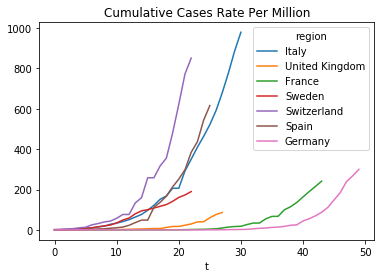

In [41]:
data.query('t_at_rate_over_1 >= 0').pivot(
    index='t', 
    columns='region', 
#     values='cumulative_confirmed_rate_per_million'
    values='cumulative_confirmed_rate_per_million'
)[eu_countries].plot(logy=False, title='Cumulative Cases Rate Per Million')

In [42]:
data.query('region=="United Kingdom"')

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,...,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t,t_at_rate_over_1
1948,United Kingdom,2020-02-24,5,13,0,8,4,4,0,0,...,0.075200,0.195521,0.000000,0.120321,0.060160,0.060160,0.000000,0.000000,0,0.0
1949,United Kingdom,2020-02-25,5,13,0,8,0,0,0,0,...,0.075200,0.195521,0.000000,0.120321,0.000000,0.000000,0.000000,0.000000,1,1.0
1950,United Kingdom,2020-02-26,5,13,0,8,0,0,0,0,...,0.075200,0.195521,0.000000,0.120321,0.000000,0.000000,0.000000,0.000000,2,2.0
1951,United Kingdom,2020-02-27,7,15,0,8,2,2,0,0,...,0.105281,0.225601,0.000000,0.120321,0.030080,0.030080,0.000000,0.000000,3,3.0
1952,United Kingdom,2020-02-28,12,20,0,8,5,5,0,0,...,0.180481,0.300802,0.000000,0.120321,0.075200,0.075200,0.000000,0.000000,4,4.0
1953,United Kingdom,2020-02-29,15,23,0,8,3,3,0,0,...,0.225601,0.345922,0.000000,0.120321,0.045120,0.045120,0.000000,0.000000,5,5.0
1954,United Kingdom,2020-03-01,28,36,0,8,13,13,0,0,...,0.421122,0.541443,0.000000,0.120321,0.195521,0.195521,0.000000,0.000000,6,6.0
1955,United Kingdom,2020-03-10,359,384,6,19,59,62,2,1,...,5.399390,5.775392,0.090241,0.285762,0.887365,0.932485,0.030080,0.015040,15,15.0
1956,United Kingdom,2020-03-11,432,459,8,19,73,75,2,0,...,6.497316,6.903398,0.120321,0.285762,1.097926,1.128006,0.030080,0.000000,16,16.0
1957,United Kingdom,2020-03-12,432,459,8,19,0,0,0,0,...,6.497316,6.903398,0.120321,0.285762,0.000000,0.000000,0.000000,0.000000,17,17.0


In [43]:
def logistic_function(t, t_mu, k, L):
    return L / (1 + np.exp(-k * (t - t_mu)))


def loss_fn(params, t, y):
    t_mu, k, L = params
    p = logistic_function(t, t_mu, k, L)
    
    return np.mean(np.square(y - p))

In [39]:
# def loss_fn(params, t, y):
#     t_mu, k, L = params
#     p = logistic_function(t, t_mu, k, L)
    
#     return -np.mean(y/L * np.log(p / L) + (1 - y/L) * np.log(1 - p/L))

# def loss_fn_grad(params, t, y):
#     t_mu, k, L = params
#     dL = k * y * (t_mu - t) / (L ** 2)
    

In [44]:
params = (5, 3, 1e6)

region = "Italy"
dt = data.query('region=="{}"'.format(region))
t = dt['t'].values
y = dt['cumulative_confirmed_rate_per_million'].values

In [45]:
result = optimize.minimize(loss_fn, (40, 1, 400), args=(t, y), 
                           bounds=[(0, None), (0, None), (y.max(), 1e6)], 
                           options={'ftol': 1e-8, 'gtol': 1e-8, 'eps': 1e-8, 'iprint': 1}
                          )

result

      fun: 98.65920105164902
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.51532128e-04,  2.49954724e-02, -2.84217094e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 204
      nit: 39
   status: 0
  success: True
        x: array([3.02243933e+01, 1.95399570e-01, 1.99226347e+03])

In [46]:
dt['date'].min() + timedelta(days=41)

Timestamp('2020-04-02 00:00:00')

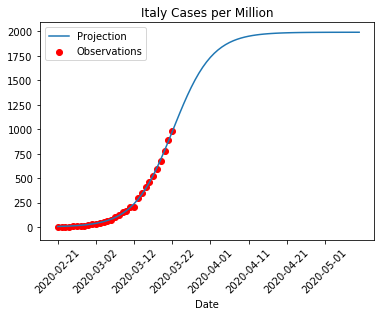

In [47]:
ts = np.arange(80)
plt.plot(logistic_function(ts, *result['x']), label='Projection')
plt.scatter(t, y, color='red', label='Observations')
plt.legend()
plt.title('{} Cases per Million'.format(region))
plt.xlabel('Date')
dates = pd.date_range(start=dt['date'].min(), periods=80)
p = plt.xticks(ticks=ts[::10], labels=dates.date[::10], rotation=45)

In [48]:
def train_regional_logistic_model(region, params=(10, 1, 10), bounds=None):
    dt = data.query('region=="{}"'.format(region))
    t = dt['t'].values
    y = dt['cumulative_confirmed_rate_per_million'].values
    
    if bounds is None:
        bounds = [(0, None), (0, None), (y.max(), 1e6)]
        
    result = optimize.minimize(
        loss_fn, params, args=(t, y), bounds=bounds, 
        options={'ftol': 1e-8, 'gtol': 1e-8, 'eps': 1e-8}
    )
    return result

In [58]:
def train_and_plot_regional_model(region, params=(10, 1, 10), bounds=None, T=80):
    result = train_regional_logistic_model(region, params=params, bounds=bounds)
    ts = np.arange(T)
    plt.plot(logistic_function(ts, *result['x']), label='Projection')
    dt = data.query('region=="{}"'.format(region))
    t = dt['t'].values
    y = dt['cumulative_confirmed_rate_per_million'].values
    plt.scatter(t, y, color='red', label='Observations')
    plt.legend()
    plt.title('{} Cases per Million'.format(region))
    plt.xlabel('Date')
    dates = pd.date_range(start=dt['date'].min(), periods=80)
    p = plt.xticks(ticks=ts[::10], labels=dates.date[::10], rotation=45)
    
    return result

      fun: 2.902674819341039
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.86224386e-04,  9.95088456e-03, -4.70734562e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 328
      nit: 51
   status: 0
  success: True
        x: array([3.20812460e+01, 2.51354585e-01, 4.05460269e+02])
Inflection Point: 32.08
Logistic Growth Parameter: 0.25
Inital Exponential Growth Rate: 1.29
Carrying Capacity: 405.46


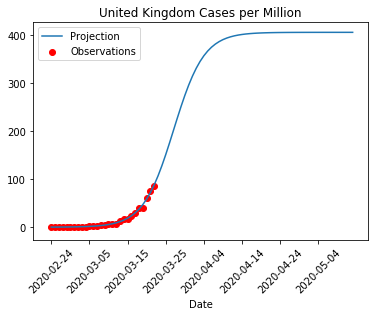

In [66]:
result = train_and_plot_regional_model('United Kingdom', params=(10, 1, 50), 
                                       bounds=None)

print(result)
print((
     "Inflection Point: {x[0]:.2f}\n"
     "Logistic Growth Parameter: {x[1]:.2f}\n"
     "Inital Exponential Growth Rate: {gr:.2f}\n"
     "Carrying Capacity: {x[2]:.2f}"
    ).format(x=np.round(result['x'], 2), gr=np.exp(result['x'][1])))

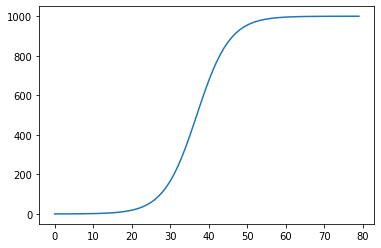

In [57]:
plt.plot(logistic_function(ts, *[36.92, 0.2338, 1000]))

In [47]:
data.query('region == "Canada"')

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,...,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t,t_at_rate_over_1
577,Canada,2020-01-26,1,1,0,0,1,1,0,0,...,0.026984,0.026984,0.000000,0.000000,0.026984,0.026984,0.000000,0.000000,0,0.0
578,Canada,2020-01-27,1,1,0,0,0,0,0,0,...,0.026984,0.026984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.0
579,Canada,2020-01-28,2,2,0,0,1,1,0,0,...,0.053968,0.053968,0.000000,0.000000,0.026984,0.026984,0.000000,0.000000,2,2.0
580,Canada,2020-01-29,2,2,0,0,0,0,0,0,...,0.053968,0.053968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,3.0
581,Canada,2020-01-30,2,2,0,0,0,0,0,0,...,0.053968,0.053968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,4.0
582,Canada,2020-01-31,4,4,0,0,2,2,0,0,...,0.107936,0.107936,0.000000,0.000000,0.053968,0.053968,0.000000,0.000000,5,5.0
583,Canada,2020-02-01,4,4,0,0,0,0,0,0,...,0.107936,0.107936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,6.0
584,Canada,2020-02-10,7,7,0,0,0,0,0,0,...,0.188889,0.188889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15,15.0
585,Canada,2020-02-11,7,7,0,0,0,0,0,0,...,0.188889,0.188889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16,16.0
586,Canada,2020-02-12,6,7,0,1,-1,0,0,1,...,0.161905,0.188889,0.000000,0.026984,-0.026984,0.000000,0.000000,0.026984,17,17.0


In [48]:
result

      fun: 0.16062077019054583
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.11972670e-06,  2.25788832e-04, -3.83637566e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 76
      nit: 15
   status: 0
  success: True
        x: array([5.09887756e+01, 2.05692386e-01, 2.00003443e+03])

In [49]:
dt['date'].min() + timedelta(days=50)

Timestamp('2020-03-21 00:00:00')

In [50]:
result

      fun: 0.16062077019054583
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.11972670e-06,  2.25788832e-04, -3.83637566e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 76
      nit: 15
   status: 0
  success: True
        x: array([5.09887756e+01, 2.05692386e-01, 2.00003443e+03])

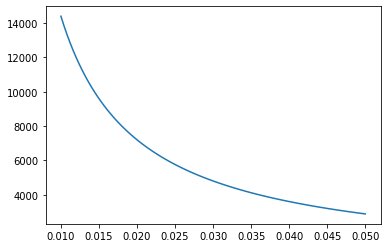

In [51]:
mortality_rate = np.linspace(0.01, 0.05, 100)
deaths = 144
growth_rate = 1.3

infected = (deaths / mortality_rate) 

plt.plot(mortality_rate, infected)

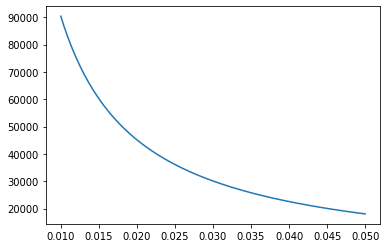

In [52]:
lag = 7

lagged_infected = infected * growth_rate ** lag

plt.plot(mortality_rate, lagged_infected)

In [53]:
1150/31

37.096774193548384

In [67]:
def cumulative_infection_count_given_death_count(
    cumulative_deaths, mortality_rate=0.01, growth_rate=1.29, lag_from_infection_to_death=7):
    """
    cumulative_deaths: total deaths from infection
    morality_rate: the proportion of those infected that go on to die
    growth_rate: the inital growth rate of the infection while still in exponential growth 
                 (technically R0)
    lag_from_infection_to_death: the number of days from initial infection to death
    """
    infected = cumulative_deaths / mortality_rate
    lagged_infected = infected * growth_rate ** lag_from_infection_to_death
    
    return lagged_infected 

In [68]:
cumulative_infection_count_given_death_count(335)

199146.54633448803